Automatically created module for IPython interactive environment
Fitting model on a small sub-sample of the data


C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


done in 0.457s.
Predicting color indices on the full image (k-means)
done in 0.246s.
Predicting color indices on the full image (random)
done in 0.314s.


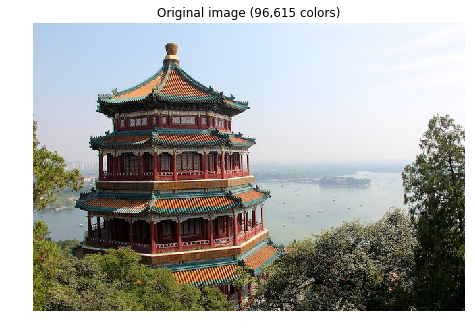

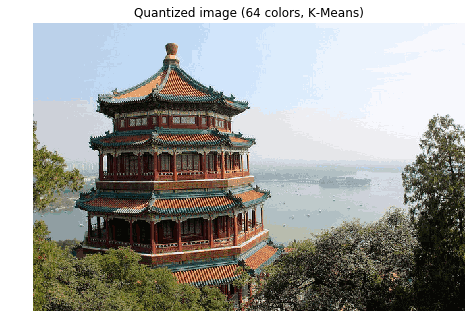

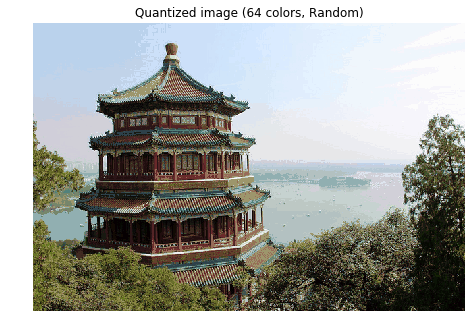

In [2]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


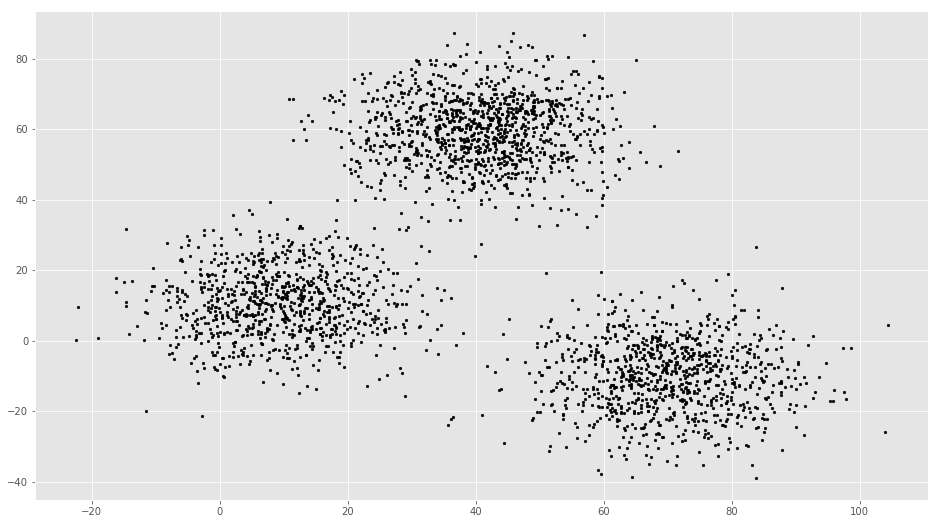

In [6]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [7]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 28.  11.]
 [  4.  70.]
 [ 66.  63.]]


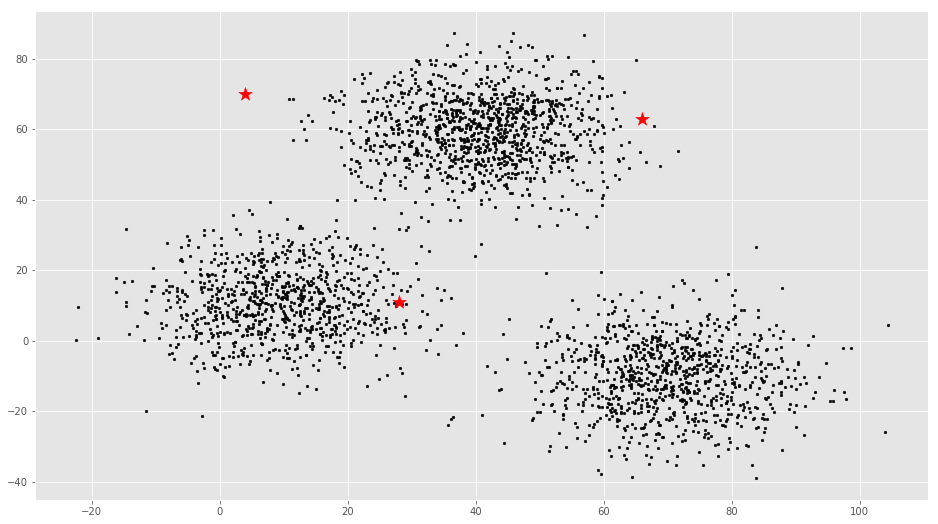

In [10]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [11]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

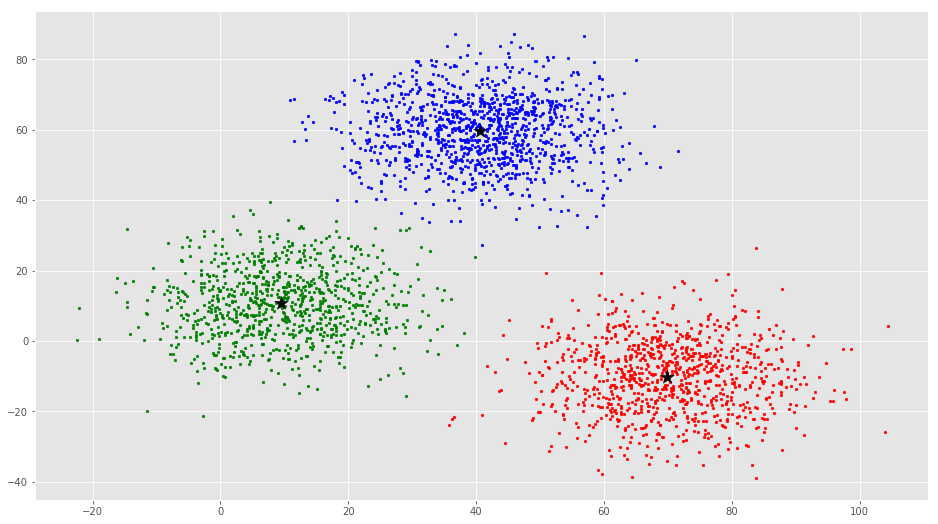

In [12]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

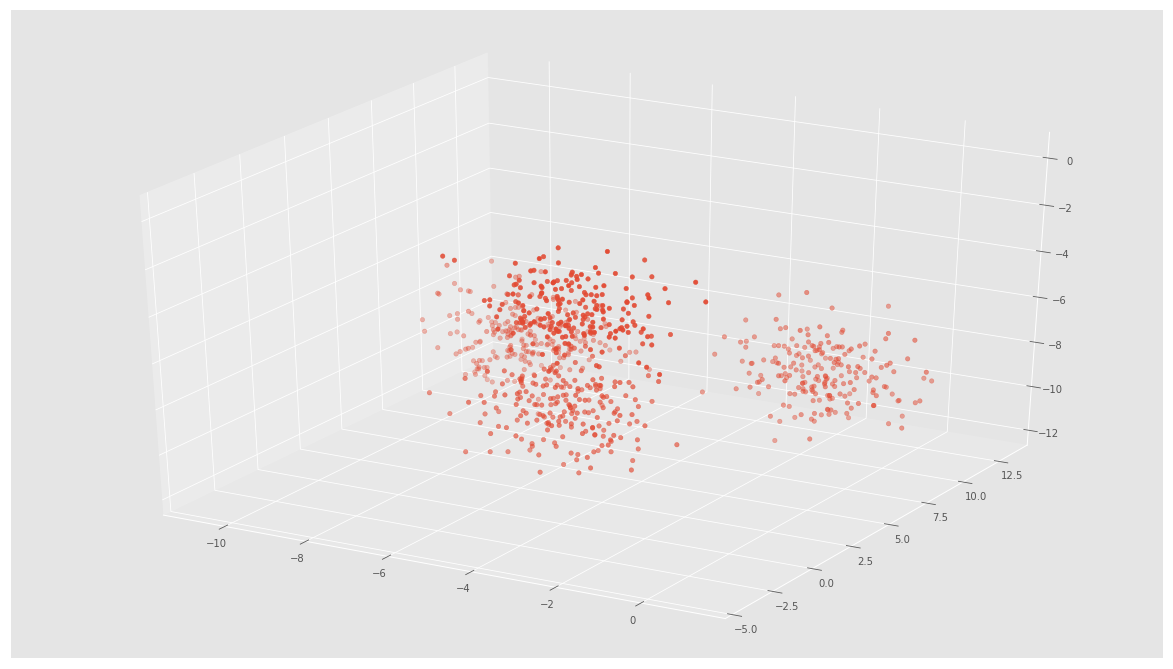

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [15]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

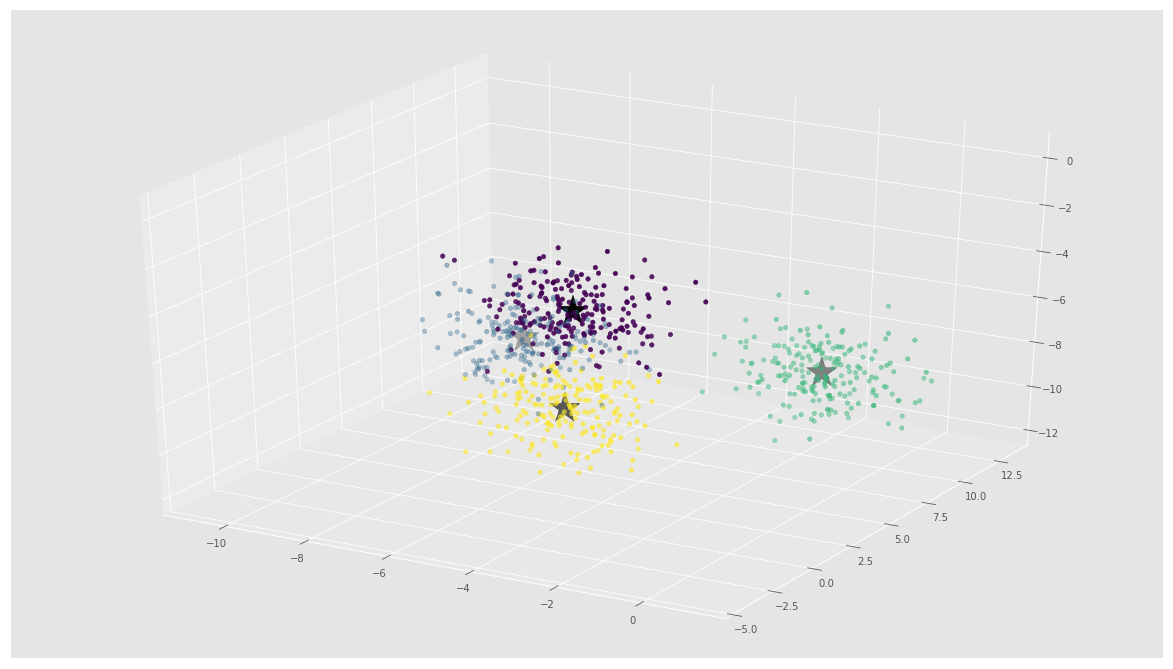

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun  1 00:02:06 2018

@author: Magneto_Wang
"""

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255






Created on Fri Jun  1 00:02:06 2018

@author: Magneto_Wang



C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [4]:
print(china.shape)

(427, 640, 3)


In [5]:
w, h, d = original_shape = tuple(china.shape)

In [6]:
print(w)
print(h)
print(d)

427
640
3


In [7]:
image_array = np.reshape(china, (w * h, d))

In [8]:
print(image_array.shape)

(273280, 3)


In [9]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]

Fitting model on a small sub-sample of the data


In [10]:
print(image_array_sample.shape)

(1000, 3)


In [11]:
n_colors=3

In [12]:
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

In [2]:
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

NameError: name 'KMeans' is not defined

In [13]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
print("done in %0.3fs." % (time() - t0))

done in 11.208s.


In [15]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()

Predicting color indices on the full image (k-means)


In [16]:
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.902s.


In [17]:
print(image_array.shape)

(273280, 3)


In [18]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")

Predicting color indices on the full image (random)


In [19]:
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

done in 0.076s.


In [20]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

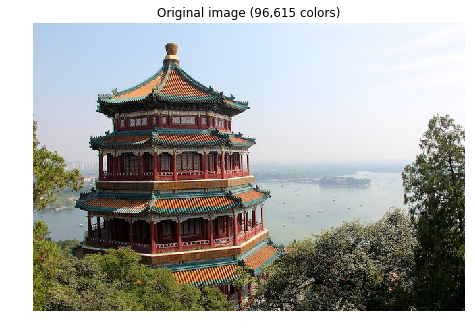

In [21]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

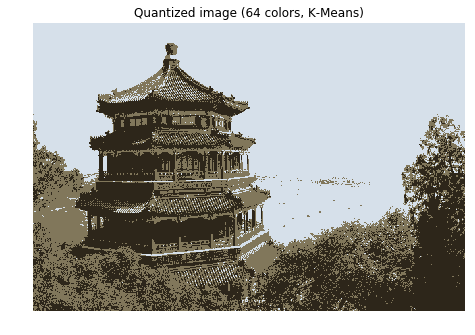

In [22]:
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [23]:
print(kmeans.cluster_centers_.shape)
print(labels.shape)
print(w)
print(h)

(3, 3)
(273280,)
427
640


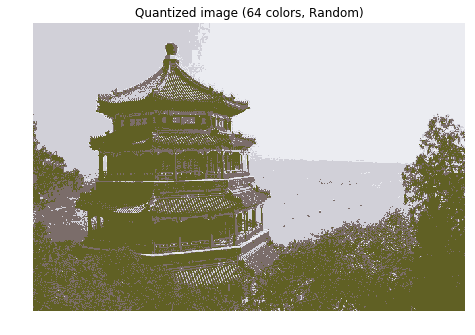

In [24]:
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.tol = tol
        self.precompute_distances = precompute_distances
        self.n_init = n_init
        self.verbose = verbose
        self.random_state = random_state
        self.copy_x = copy_x
        self.n_jobs = n_jobs
        self.algorithm = algorithm

        random_state = check_random_state(self.random_state)
        X = self._check_fit_data(X)

        self.cluster_centers_, self.labels_, self.inertia_, self.n_iter_ = \
            k_means(
                X, n_clusters=self.n_clusters, init=self.init,
                n_init=self.n_init, max_iter=self.max_iter, verbose=self.verbose,
                precompute_distances=self.precompute_distances,
                tol=self.tol, random_state=random_state, copy_x=self.copy_x,
                n_jobs=self.n_jobs, algorithm=self.algorithm,
                return_n_iter=True)

        X : array-like or sparse matrix, shape=(n_samples, n_features)
            Training instances to cluster.

   """K-means clustering algorithm.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.

    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++':

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.

        If a callable is passed, it should take arguments X, k and
        and a random state and return an initialization.

    precompute_distances : {'auto', True, False}
        Precompute distances (faster but takes more memory).

        'auto' : do not precompute distances if n_samples * n_clusters > 12
        million. This corresponds to about 100MB overhead per job using
        double precision.

        True : always precompute distances

        False : never precompute distances

    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.

    max_iter : int, optional, default 300
        Maximum number of iterations of the k-means algorithm to run.

    verbose : boolean, optional
        Verbosity mode.

    tol : float, optional
        The relative increment in the results before declaring convergence.

    random_state : int, RandomState instance or None, optional, default: None
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    copy_x : boolean, optional
        When pre-computing distances it is more numerically accurate to center
        the data first.  If copy_x is True, then the original data is not
        modified.  If False, the original data is modified, and put back before
        the function returns, but small numerical differences may be introduced
        by subtracting and then adding the data mean.

    n_jobs : int
        The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.

        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.

    algorithm : "auto", "full" or "elkan", default="auto"
        K-means algorithm to use. The classical EM-style algorithm is "full".
        The "elkan" variation is more efficient by using the triangle
        inequality, but currently doesn't support sparse data. "auto" chooses
        "elkan" for dense data and "full" for sparse data.

    return_n_iter : bool, optional
        Whether or not to return the number of iterations.

    Returns
    -------
    centroid : float ndarray with shape (k, n_features)
        Centroids found at the last iteration of k-means.

    label : integer ndarray with shape (n_samples,)
        label[i] is the code or index of the centroid the
        i'th observation is closest to.

    inertia : float
        The final value of the inertia criterion (sum of squared distances to
        the closest centroid for all observations in the training set).

    best_n_iter : int
        Number of iterations corresponding to the best results.
        Returned only if `return_n_iter` is set to True.

    """

X = as_float_array(X, copy=copy_x)
tol = _tolerance(X, tol)
    variances = np.var(X, axis=0)
np.mean(variances) * tol

n_samples = X.shape[0]
precompute_distances = (n_clusters * n_samples) < 12e6
    
    
X_mean = X.mean(axis=0)
#The copy was already done above
X -= X_mean

precompute squared norms of data points
x_squared_norms = row_norms(X, squared=True)

best_labels, best_inertia, best_centers = None, None, None


kmeans_single = _kmeans_single_elkan


    if n_jobs == 1:
        # For a single thread, less memory is needed if we just store one set
        # of the best results (as opposed to one set per run per thread).
        for it in range(n_init):
            # run a k-means once
            labels, inertia, centers, n_iter_ = kmeans_single(
                X, n_clusters, max_iter=max_iter, init=init, verbose=verbose,
                precompute_distances=precompute_distances, tol=tol,
                x_squared_norms=x_squared_norms, random_state=random_state)
            # determine if these results are the best so far
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels.copy()
                best_centers = centers.copy()
                best_inertia = inertia
                best_n_iter = n_iter_
                
                
              best_centers += X_mean
              
              best_centers, best_labels, best_inertia, best_n_iter

    def predict(self, X):
        """Predict the closest cluster each sample in X belongs to.

        In the vector quantization literature, `cluster_centers_` is called
        the code book and each value returned by `predict` is the index of
        the closest code in the code book.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            New data to predict.

        Returns
        -------
        labels : array, shape [n_samples,]
            Index of the cluster each sample belongs to.
        """
        check_is_fitted(self, 'cluster_centers_')

        X = self._check_test_data(X)
        x_squared_norms = row_norms(X, squared=True)
        return _labels_inertia(X, x_squared_norms, self.cluster_centers_)[0]


In [40]:
from collections import defaultdict
from random import uniform
from math import sqrt



def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.itervalues():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = ()  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return zip(assignments, dataset)

In [41]:
n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [42]:
china.shape

(427, 640, 3)

In [43]:
china = np.array(china, dtype=np.float64) / 255

In [44]:
image_array = np.reshape(china, (w * h, d))

In [45]:
image_array.shape

(273280, 3)

In [46]:
result=k_means(image_array, n_colors)

TypeError: '<' not supported between instances of 'float' and 'tuple'